# DESCRIPTION

## Objective: 

Make a model to predict the app rating, with other information about the app provided.

   *** 

## Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. 
The boost will manifest in multiple ways including higher priority in recommendations sections 
(“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  
This feature will help bring more attention to newer apps that have the potential.

    *** 

## Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. 
App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. 
The problem reduces to: predict which apps will have high ratings.

       *** 

### Content: Dataset: Google Play Store data (“googleplaystore.csv”)

# Fields in the data –

1. App: Application name

2. Category: Category to which the app belongs 

3. Rating: Overall user rating of the app

4. Reviews: Number of user reviews for the app

5. Size: Size of the app

6. Installs: Number of user downloads/installs for the app

7. Type: Paid or Free

8. Price: Price of the app

9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

10. Genres: An app can belong to multiple genres (apart from its main category). 
For example, a musical family game will belong to Music, Game, Family genres.

11. Last Updated: Date when the app was last updated on Play Store

12. Current Ver: Current version of the app available on Play Store

13. Android Ver: Minimum required Android version



# 1. Load the Data: Data Acquistion and Reading Data  

We download the google playstore dataset in csv format and upload them in the current Jupyter folder directory in which we are 
working. 

In [113]:
#Loading packages for solving this problem 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [2]:
#Loading the App prediction data file for analysis 

app = pd.read_csv('googleplaystore.csv')
app.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 2. Check for null values in data. Get the no. of null values for each column.

In [4]:
app.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3. Drop records with nulls in any of the columns.

In [5]:
app.dropna(inplace=True)
print("Verify the data for any null values after removing them")
app.isna().sum()

Verify the data for any null values after removing them


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4. Variables seem to have incorrect type and inconsistent formatting. You   
 
   # need to fix them: (Correcting data formatting errors)

a. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

b). Extract the numeric value from the column

c). Multiply the value by 1,000, if size is mentioned in Mb

d). Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

e). Installs field is currently stored as string and has values like 1,000,000+. 

f). Treat 1,000,000+ as 1,000,000

g). remove ‘+’, ‘,’ from the field, convert it to integer

h). Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

a. Extract the value of the column Size

In [7]:
app['Size'] #The data type of the Size column is object. We must convert them into a standard unified format. 

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

__Especially, we have to remove the entries under Size column that states 'Varies with device'__. 

In [8]:
app= app[-app['Size'].str.contains('Var')]

In [9]:
app.head(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [10]:
app['Size'] #The 'Varies with device' entry is removed from the Size column

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7723, dtype: object

__Removing the M and K placed as MB and KB in the Size column__

In [11]:
app.loc[:,'SizeNum']= app.Size.str.rstrip('Mk+')

In [12]:
app['SizeNum'] #The M and K is removed from the Size column

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10833    619
10834    2.6
10836     53
10837    3.6
10840     19
Name: SizeNum, Length: 7723, dtype: object

__d. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)__.

In [13]:
app.SizeNum=pd.to_numeric(app['SizeNum'])
app.SizeNum.dtype

dtype('float64')

__c.  Multiply the value by 1,000, if size is mentioned in Mb__

In [14]:
#np.where(condition whereever this condition is true make the changes in sizenumcolum i.e multiply y 1000 and returns sizeum)

In [15]:
app['SizeNum']=np.where(app.Size.str.contains('M'),app.SizeNum*1000, app.SizeNum)
app['SizeNum']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: SizeNum, Length: 7723, dtype: float64

__Dropping SizeNum after assgning it to the Size column__

In [16]:
app.Size=app.SizeNum
app.drop('SizeNum',axis=1,inplace=True) #Dropping SizeNum after assigning it to Size 

In [17]:
app.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7723, dtype: float64

__d. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)__.


In [18]:
app.Reviews = pd.to_numeric(app.Reviews)

In [19]:
app.Reviews.dtype

dtype('int64')

In [20]:
app.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10833        44
10834         7
10836        38
10837         4
10840    398307
Name: Reviews, Length: 7723, dtype: int64

__e). Installs field is currently stored as string and has values like 1,000,000+. 

__f). Treat 1,000,000+ as 1,000,000

__g). remove ‘+’, ‘,’ from the field, convert it to integer

In [21]:
app['Installs']=app.Installs.str.replace("+","")

<ipython-input-21-2283dfce9623>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  app['Installs']=app.Installs.str.replace("+","")


In [22]:
app.Installs=app.Installs.str.replace(",","")
app.Installs=pd.to_numeric(app.Installs)
app.Installs.dtype

dtype('int64')

In [23]:
app.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

__h). Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric__.

In [24]:
app.Price=app.Price.str.replace("$","")
app.Price=pd.to_numeric(app.Price)
app.Price.dtype

<ipython-input-24-876e60bb8d5b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  app.Price=app.Price.str.replace("$","")


dtype('float64')

In [25]:
import warnings
warnings.filterwarnings('ignore')

# 5. Sanity checks:

a. Average rating should be between 1 and 5 as only these values are allowed on the play store. 
Drop the rows that have a value outside this range.

b. Reviews should not be more than installs as only those who installed can review the app. 
If there are any such records, drop them.

c. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

__a. Average rating should be between 1 and 5 as only these values are allowed on the play store. 
    Drop the rows that have a value outside this range.

In [26]:
app = app[(app.Rating>=1) & (app.Rating<=5)]

In [27]:
len(app)

7723


__b. Reviews should not be more than installs as only those who installed can review the app. 
     If there are any such records, drop them.

In [28]:
app.drop(app.index[app.Reviews>app.Installs],axis=0,inplace=True)  #We have used app.index, hence we are using square bracket[]
len(app.index)

7717

__c. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [29]:
index_free_and_price_gt_0=app.index[((app.Type=='Free')&(app.Price>0))]
if len(index_free_and_price_gt_0)>0:
    print("Dropping following indices:",index_free_and_price_gt_0)
    app.drop(index_free_and_price_gt_0,axis=0,inplace=True)
else:
    print("There is no Free Apps with price >0")

There is no Free Apps with price >0


# 5. Performing univariate analysis: 

__a). Boxplot for Price

   __Are there any outliers? Think about the price of usual apps on Play Store.

__b). Boxplot for Reviews

   __Are there any apps with very high number of reviews? Do the values seem right?

__c). Histogram for Rating

   __How are the ratings distributed? Is it more toward higher ratings?

__d). Histogram for Size

   __Note down your observations for the plots made above. Which of these seem to have outliers?

# Calculating total number of outliers for Price, Reviews and Rating column

Before getting into univariate visualization, we need to have an outline check over the total number of outliers for columns Price, Reviews and Rating. Below we calculate the outliers for all these three columns. 

In [ ]:
#Calculating Outliers for the Price column 

In [ ]:
#Outlier = Mean + 3 Sigma(Standard deviation) (Outlier Formula)

In [32]:
price_std=stc.stdev(app.Price)
price_std

17.414783874309933

In [33]:
price_mean=stc.mean(app.Price)
price_mean

1.128724893093171

In [34]:
price_outlier_uplimit=price_mean+3*price_std
price_outlier_uplimit

53.37307651602297

In [41]:
price_outlier_downlimit= price_mean-3*price_std
price_outlier_downlimit

-51.11562672983663

In [ ]:
#Printing the number of upper outliers 

In [35]:
print("# of upper outliers is ",len(app[(app.Price>price_outlier_uplimit) ]))

# of upper outliers is  17


In [ ]:
#Printing the number of lower outliers 

In [47]:
print("# of lower outliers is ",len(app[(app.Price<price_outlier_downlimit) ]))

# of lower outliers is  0


In [ ]:
#The total number of upper outliers is 17 and the lower outliers is 0

In [ ]:
# Calculating Outliers for Reviews  

In [37]:
rev_std=stc.stdev(app.Reviews)
rev_std

1864639.6094670836

In [38]:
rev_mean=stc.mean(app.Reviews)
rev_mean

295127.5482700531

In [39]:
rev_outlier_uplimit=rev_mean+3*rev_std
rev_outlier_uplimit

5889046.376671304

In [40]:
rev_outlier_downlimit=rev_mean-3*rev_std
rev_outlier_downlimit

-5298791.280131198

In [44]:
print("# of upper outliers is ",len(app[(app.Reviews>rev_outlier_uplimit) ]))

# of upper outliers is  89


In [46]:
print("# of lower outliers is ",len(app[(app.Reviews<rev_outlier_downlimit) ]))

# of lower outliers is  0


In [ ]:
#The total number of upper outliers for Reveiws column is 89. For, lower outliers, it is 0

In [ ]:
#Calculating the rating outliers (Ratings tend to higher values. Its outliers is not much necessary. But we calculate it)

In [48]:
rating_std= stc.stdev(app.Rating)
rating_std

0.5443624108863263

In [49]:
rating_mean= stc.mean(app.Rating)
rating_mean

4.173292730335622

In [50]:
rating_upper_limit_outliers= rating_mean+3*rating_std
rating_upper_limit_outliers

5.806379962994601

In [51]:
rating_lower_limit_outliers= rating_mean-3*rating_std
rating_lower_limit_outliers

2.5402054976766433

In [ ]:
#The upper limit outliers for rating is obviously 5.8 and the lower limit outliers is 2.54

__a). Boxplot for Price

   __Are there any outliers? Think about the price of usual apps on Play Store.

<AxesSubplot:xlabel='Price'>

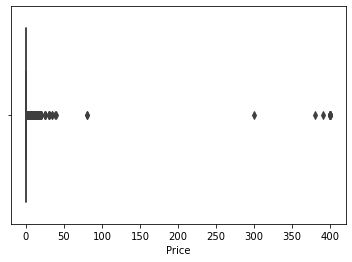

In [36]:
sns.boxplot(x='Price', data=app)

In [ ]:
#Most of the price values are less than 50. The outliers are 100, 300 and etc

__b). Boxplot for Reviews

   __Are there any apps with very high number of reviews? Do the values seem right?

<AxesSubplot:xlabel='Reviews'>

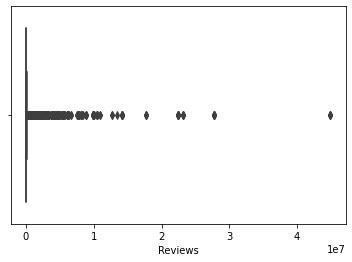

In [31]:
sns.boxplot(x='Reviews', data=app)

In [ ]:
#Most apps get around 2million review anything greater than that is an outlier 

__c). Histogram for Rating

   __How are the ratings distributed? Is it more toward higher ratings?

<AxesSubplot:xlabel='Rating', ylabel='Count'>

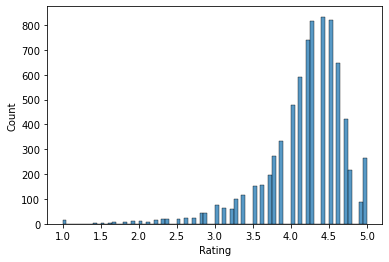

In [52]:
sns.histplot(x='Rating',data=app)

In [ ]:
#The ratings are skewed towards left and majority of the points fall between the ratings of 3 to 4.5 

__d). Histogram for Size

   __Note down your observations for the plots made above. Which of these seem to have outliers?

<AxesSubplot:xlabel='Size', ylabel='Count'>

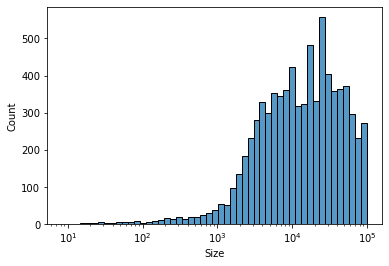

In [53]:
sns.histplot(x='Size', data=app, log_scale=True)


In [ ]:
#The Size column is skewed towards left. 

# 6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. 
A price of $200 for an application on the Play Store is very high and suspicious!

a). Check out the records with very high price

b). Is 200 indeed a high price?

c). Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. 
These are all star apps that don’t help with the analysis and, in fact, will skew it. 

d). Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. 

e). Apps having very high number of installs should be dropped from the analysis.

f). Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

g). Decide a threshold as cutoff for outlier and drop records having values more than that

Price: From the box plot, it seems like there are some apps with very high price. 
A price of $200 for an application on the Play Store is very high and suspicious!

a). Check out the records with very high price

b). Is 200 indeed a high price?

c). Drop these as most seem to be junk apps

In [55]:
app['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7717, dtype: float64

In [56]:
app[app.Price>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [57]:
print("# of Apps with price >= 200 = ",len(app[(app.Price>=200) ]))

# of Apps with price >= 200 =  15


In [ ]:
#The total number of apps with price greater than 200 is 15. 

In [ ]:
#Drop the apps with price greater than 200

In [58]:
app.drop(app.index[(app.Price>=200)], inplace=True)
len(app.index)

7702

Reviews: Very few apps have very high number of reviews. 
These are all star apps that don’t help with the analysis and, in fact, will skew it. 

d). Drop records having more than 2 million reviews.

In [ ]:
#Drop apps with more than 2 million reviews 

In [59]:
app.drop(app.index[(app.Reviews>=2000000)], inplace=True)
len(app.index)

7483

Installs:  There seems to be some outliers in this field too. 

e). Apps having very high number of installs should be dropped from the analysis.

f). Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

g). Decide a threshold as cutoff for outlier and drop records having values more than that

In [ ]:
#Remove the outliers from the installs 

In [60]:
install_10_perc=np.percentile(app.Installs, 10)
install_10_perc

1000.0

In [61]:
install_25_perc=np.percentile(app.Installs, 25)
install_25_perc

10000.0

In [62]:
install_50_perc=np.percentile(app.Installs, 50)
install_50_perc

100000.0

In [63]:
install_70_perc=np.percentile(app.Installs, 70)
install_70_perc

1000000.0

In [64]:
install_90_perc=np.percentile(app.Installs, 90)
install_90_perc

10000000.0

In [65]:
install_95_perc=np.percentile(app.Installs, 95)
install_95_perc

10000000.0

In [66]:
install_99_perc=np.percentile(app.Installs, 99)
install_99_perc

50000000.0

<AxesSubplot:xlabel='Installs', ylabel='Count'>

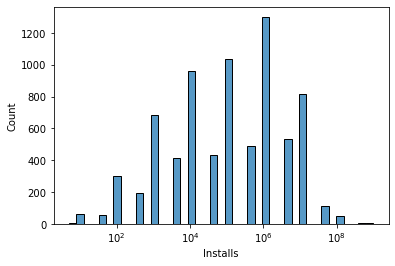

In [67]:
sns.histplot(data=app,x='Installs',log_scale=True)

In [ ]:
#We will drop values that are greater than the percentile of 99

In [68]:
print("As result, ",len(app[app.Installs >= install_99_perc])," will be dropped")

As result,  176  will be dropped


In [ ]:
#99 percentile is 3 * standard deviation. 176 outlier values will be dropped from the Installs 

In [69]:
app.drop(app.index[app.Installs >= install_99_perc],inplace=True)
len(app.index)

7307

# 7. Bivariate analysis: 

Let’s look at how the available predictors relate to the variable of interest, i.e.,our target variable rating. 

Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

a). Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

b). Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

c). Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

d). Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

e). Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation.

a). Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

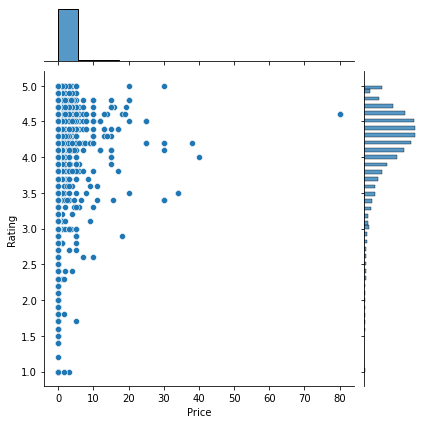

In [70]:
sns.jointplot(x='Price', y='Rating', data=app)

In [ ]:
#Apps with price greater than 3 has high rating compared to the apps with lower prices. 
#This is because majority of apps have a low price in addition to apps with getting greater than 3 ratings
#The scatterplot or jointplot shows that the price has minimal impact on rating. 

b). Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

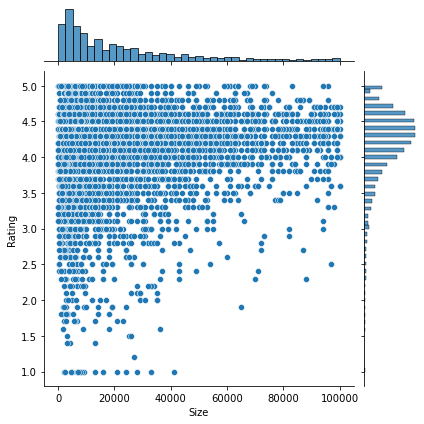

In [72]:
sns.jointplot(x='Size', y='Rating', data=app)

In [ ]:
#The apps that have greater than 3 ratings are evenly distributed. The relationship between rating and size is weak. 

c). Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

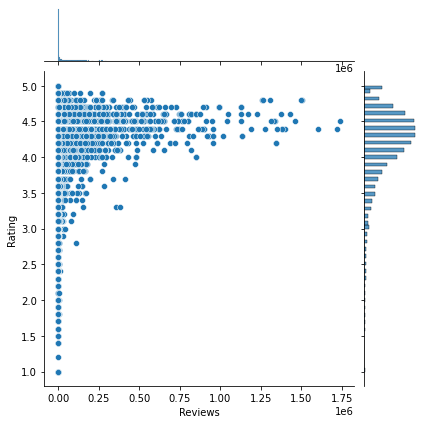

In [75]:
sns.jointplot(x='Reviews', y='Rating', data=app)

In [ ]:
#There is no much relationship between ratings and reviews.
#But highly reviewed apps stay in the high rating area. 
#Good apps get more positive reviews than others 

d). Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

In [76]:
app['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

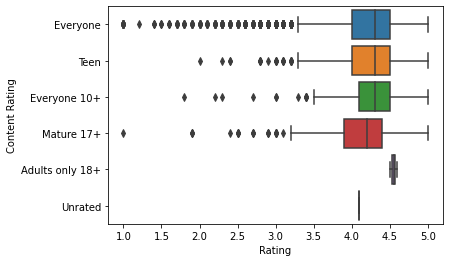

In [77]:
sns.boxplot(x='Rating', y='Content Rating', data=app)

In [ ]:
#The apps of adults 18+ category has higher rating of around 4.5 compared to other apps. 
#Though mature 17+ apps gets closer to the adults 18+ category, it is not as high as adult 18+ apps
#This shows that the type of content for apps impact its ratings considerably. 

e). Make boxplot for Ratings vs. Category

Which genre has the best ratings?


In [78]:
app['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<AxesSubplot:xlabel='Rating', ylabel='Category'>

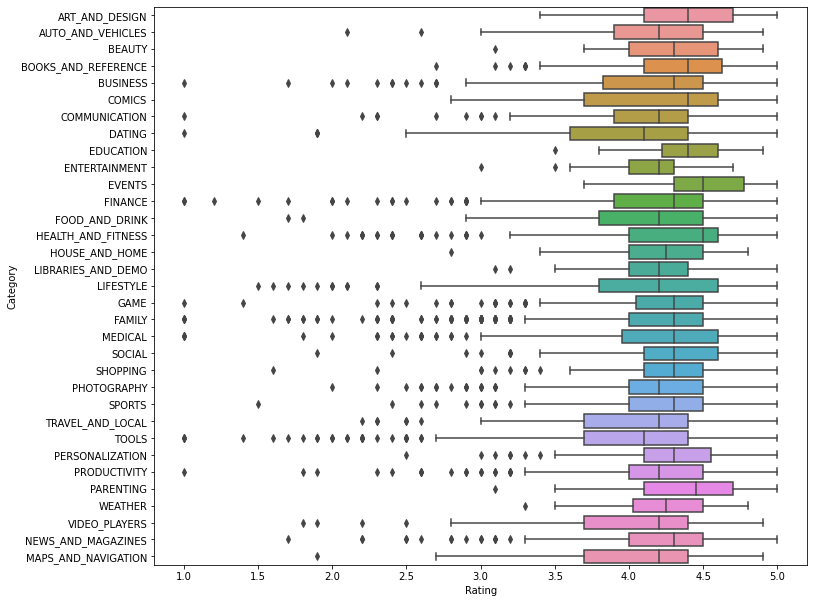

In [84]:
a4_dims = (11.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='Rating', y='Category', data=app, ax=ax)

In [ ]:
#Which genre has the best ratings overall?
#The events genre has the best ratings compared to other categories. 

# 8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

a). Reviews and Install have some values that are still relatively very high. 
Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

b). Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

c). Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. 
Name of dataframe should be inp2.

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

a). Reviews and Install have some values that are still relatively very high. 
Before building a linear regression model, you need to reduce the skew. 
Apply log transformation (np.log1p) to Reviews and Installs.

In [ ]:
#Log transformation of data to reduce its skweness 

In [85]:
inp1=app.copy()
inp1.Reviews=inp1.Reviews.apply(np.log1p)
inp1.Installs=inp1.Installs.apply(np.log1p)

b). Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [86]:
inp1.drop(columns=['App','Last Updated','Current Ver','Android Ver'],inplace=True)

In [87]:
inp1.shape

(7307, 9)

c). Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. 
Name of dataframe should be inp2.

In [88]:
inp2= pd.get_dummies(inp1)

In [89]:
inp2.shape

(7307, 158)

# 9. Linear Regression

9. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

11. Model building

Use linear regression as the technique

Report the R2 on the train set

12. Make predictions on test set and report R2.

In [95]:
lr= LinearRegression()

In [90]:
data = inp2.drop(columns='Rating')
data.shape

(7307, 157)

In [106]:
data

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3.806662,619.0,6.908755,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10834,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
target

,Rating
0,4.1
1,3.9
2,4.7
4,4.3
5,4.4
...,...
10833,4.8
10834,4.0
10836,4.5
10837,5.0


In [91]:
target = pd.DataFrame(inp2.Rating)
target.shape

(7307, 1)

In [92]:
inp2

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,619.0,6.908755,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=3)

In [94]:
print("x_train shape is ", x_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", x_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (5114, 157)
y_train shape is  (5114, 1)
x_test shape is  (2193, 157)
y_test shape is  (2193, 1)


In [ ]:
#Building the Linear Regression Model 

In [99]:
model= lr.fit(x_train, y_train)

In [100]:
model

LinearRegression()

In [134]:
r2_value_training_data= lr.score(x_train,y_train) #R2 Value on the training set is 0.15

In [136]:
r2_value_training_data

0.15264772134593896

In [135]:
r2_value_test_data= lr.score(x_test,y_test) #R2 value on the test set is 0.142

In [137]:
r2_value_test_data

0.142622630309571

In [138]:
print("The r2 value for training data is: ", r2_value_training_data)

The r2 value for training data is:  0.15264772134593896


In [139]:
print("The r2 value for test data is: ", r2_value_test_data)

The r2 value for test data is:  0.142622630309571


In [107]:
lr.intercept_

array([4.67859262])

In [126]:
lr.coef_

array([[ 1.73847530e-01, -4.41755328e-07, -1.50819756e-01,
         2.07700952e-03, -1.22374537e-01,  1.68687788e-02,
         1.11726901e-01,  7.41735620e-02, -3.10847924e-02,
         1.86247821e-01, -7.74229572e-02, -1.17999974e-01,
         8.09034526e-03, -8.03406151e-02,  1.84739559e-01,
         1.66360495e-02, -5.32714099e-02, -1.04483562e-02,
         1.95012078e-01, -1.01532100e-02, -8.04784542e-03,
         3.81147129e-02, -2.84789681e-02, -1.17169755e-01,
         2.18056774e-02, -4.71001302e-02,  3.97240043e-02,
         3.97450045e-02, -4.00960463e-02, -4.62446467e-02,
        -2.24766842e-02,  1.25537626e-04,  2.06600228e-01,
        -9.25028210e-02, -5.01156582e-02, -1.61544261e-01,
        -2.27375906e-02,  3.30718432e-02, -3.30718432e-02,
         2.49178594e-01, -5.24773120e-02, -3.59382559e-02,
        -7.75255013e-02, -6.05465554e-02, -2.26909694e-02,
        -2.82402833e-01, -1.39814952e-02, -3.38393208e-01,
        -2.88471727e-01, -1.30673250e-12, -2.89983346e-0

y actual --- y_test 
y_cap -- predicted 
X_test --- y_test given or actual target
predict target for  X_test 

In [127]:
train_prediction= lr.predict(x_train)
train_prediction

array([[3.9179402 ],
       [4.0330809 ],
       [3.92416442],
       ...,
       [4.25600415],
       [4.50377444],
       [4.17461692]])

In [130]:
y_test

,Rating
10213,4.6
6771,4.5
1900,4.5
8492,4.5
10160,4.4
...,...
9477,4.5
4011,4.7
1589,3.9
1123,4.4


In [131]:
x_test

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
10213,12.518124,9900.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6771,4.394449,16000.0,9.210440,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1900,9.993922,14000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8492,6.278521,6400.0,9.210440,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10160,3.496508,2300.0,6.908755,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9477,9.706682,1600.0,13.122365,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4011,6.562444,26000.0,8.517393,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1589,9.850192,1800.0,15.424949,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1123,9.625228,25000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Predicted values for the Linear Regression

In [128]:
test_prediction = lr.predict(x_test)

In [129]:
test_prediction #Predicted values 

array([[4.50492281],
       [3.96479724],
       [4.54107179],
       ...,
       [3.98747865],
       [4.13127041],
       [3.79402372]])

In [ ]:
#R2 Value on the training set is 0.15

In [ ]:
#R2 value on the test set is 0.142